## Task 3 - EDA
using sweet viz

In [545]:
import pandas as pd
import numpy as np
import sweetviz 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import set_config
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [546]:
#read in data file
housing_df = pd.read_csv ('data/kc_house_data_classification.csv')
print(housing_df)

housing_df.dtypes

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_gt_1M        int64
dtype: object

In [547]:
report = sweetviz.analyze(housing_df)

                                             |                                             | [  0%]   00:00 ->…

In [548]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Task 4 - Categorize feature types
NOTE: Waterfront: ‘1’ if the property has a waterfront, ‘0’ if not.

In [549]:
#Use categorical() function to change 3 columns to categorical, the rest are numeric
housing_df['waterfront'] = housing_df.waterfront.astype('object')
housing_df['bedrooms'] = housing_df.bedrooms.astype('object')
housing_df['bathrooms'] = housing_df.bathrooms.astype('object')
housing_df['floors'] = housing_df.floors.astype('object')
housing_df['view'] = housing_df.view.astype('object')
housing_df['condition'] = housing_df.condition.astype('object')
housing_df['grade'] = housing_df.grade.astype('object')
housing_df['lat'] = housing_df.lat.astype('int64')
housing_df['long'] = housing_df.long.astype('int64')
housing_df.dtypes

bedrooms         object
bathrooms        object
sqft_living       int64
sqft_lot          int64
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat               int64
long              int64
sqft_living15     int64
sqft_lot15        int64
price_gt_1M       int64
dtype: object

In [550]:
#preview data
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639,0
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062,0
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000,0
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47,-122,1530,1509,0
21609,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47,-122,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47,-122,1020,2007,0
21611,3,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47,-122,1410,1287,0


In [551]:
#code to use from assignment to partition data. Column 19 left out
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [552]:
#create training and test sets using code from assignment and define categroical and numeric columns to a list

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

all_cols = X_train.columns.tolist()


In [553]:
numeric_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [554]:
categorical_cols

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

### Pipeline 
Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling 

In [555]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])


set_config(display='diagram')
clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition',
                                                   'grade'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=2000, solver='saga'))])

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}") 

Training score: 0.960
Test score: 0.955


### Null Model
What would be the performance of a model in which we just predict 0 for everyone

In [557]:
#Essentially the accuracy test
count = (housing_df['price_gt_1M'] == 0).sum()
accuracy=(count/len(housing_df['price_gt_1M']))
percentage = "{:.0%}".format(accuracy)
print(percentage)

93%


### Model 1: Ridge regression with C=1.0
Build a ridge regression model to predict price_gt_1M and use the default value of C=1.0. I used the following additional options with the LogisticRegression model - solver='saga', max_iter=2000. 


In [558]:
# Classifier model
clf_model_C1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_C1)])

# Fit model on training data 
clf_C1.fit(X_train, y_train)

print(f"Training score: {clf_C1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_C1.score(X_test, y_test):.3f}")

Training score: 0.960
Test score: 0.955


Confusion matrix for train, without normalization
[[15935   192]
 [  503   660]]
Normalized confusion matrix for train
[[0.9880945  0.0119055 ]
 [0.43250215 0.56749785]]


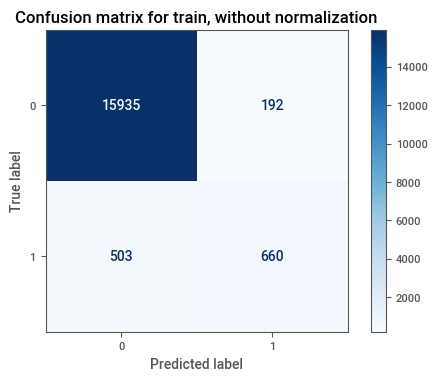

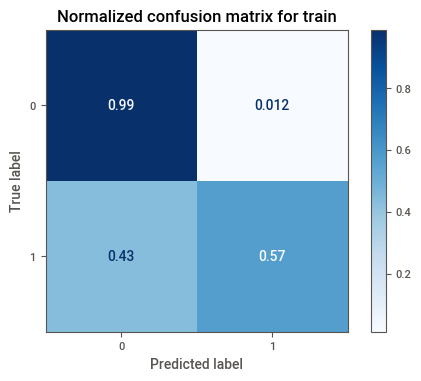

In [559]:

#Create confusion matrices for training 
#Create a plot of the coefficients
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_C1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_C1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



Confusion matrix for test, without normalization
[[3944   50]
 [ 143  186]]
Normalized confusion matrix for test
[[0.98748122 0.01251878]
 [0.43465046 0.56534954]]


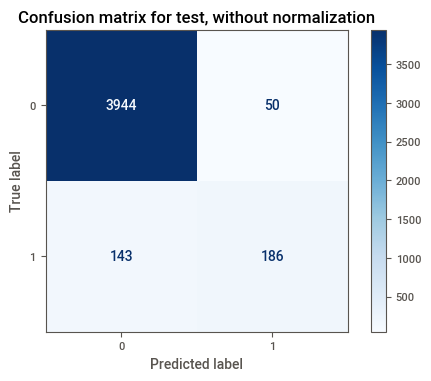

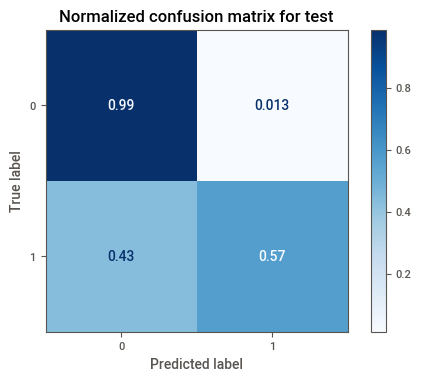

In [560]:
#test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_C1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_C1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [561]:
#print coeff
clf_C1.named_steps['classifier'].coef_.shape

(1, 81)

In [562]:
#model steps
clf_C1.steps[1]

('classifier', LogisticRegression(max_iter=2000, solver='saga'))

### Plot coefficients

In [563]:
#define plot
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

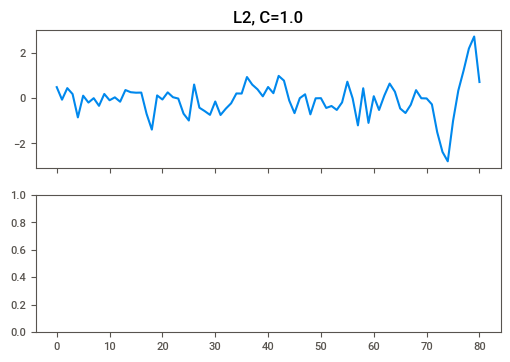

In [564]:
#plot
coef_plot(clf_C1, 'L2, C=1.0')

### Model 2: Lasso regression with C=1.0

In [565]:
# Classifier model
clf_model_l1_C1 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_l1_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_C1)])

# Fit model on training data 
clf_l1_C1.fit(X_train, y_train)

print(f"Training score: {clf_l1_C1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_C1.score(X_test, y_test):.3f}")

Training score: 0.960
Test score: 0.956


Confusion matrix for train, without normalization
[[15936   191]
 [  508   655]]
Normalized confusion matrix for train
[[0.98815651 0.01184349]
 [0.43680138 0.56319862]]


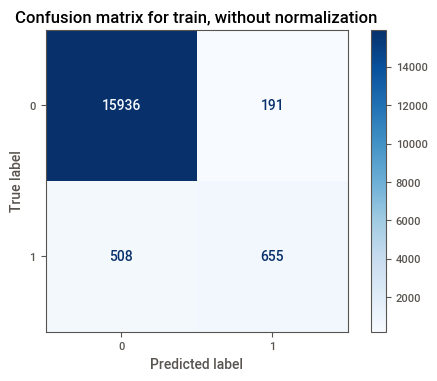

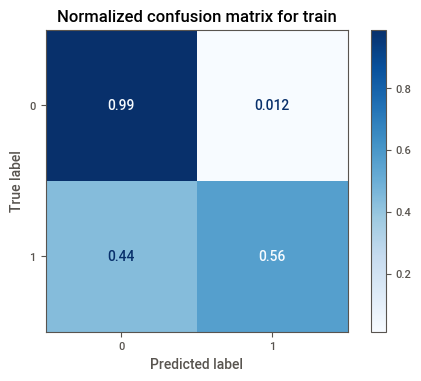

In [566]:
#Create confusion matrices for training 
#Create a plot of the coefficients
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names =clf_l1_C1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3947   47]
 [ 144  185]]
Normalized confusion matrix for test
[[0.98823235 0.01176765]
 [0.43768997 0.56231003]]


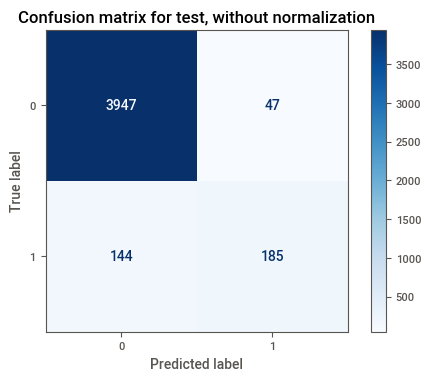

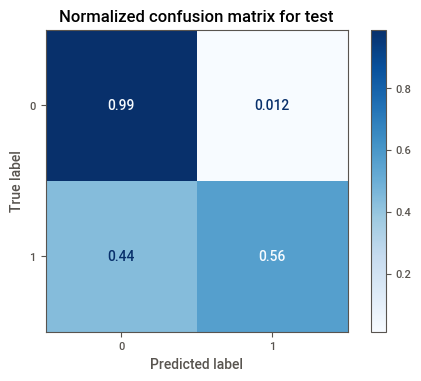

In [567]:
#test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names =clf_l1_C1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [568]:
#print coeff
clf_l1_C1.named_steps['classifier'].coef_.shape

(1, 81)

In [569]:
#model steps
clf_l1_C1.steps[1]

('classifier', LogisticRegression(max_iter=2000, penalty='l1', solver='saga'))

In [570]:
#define plot
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

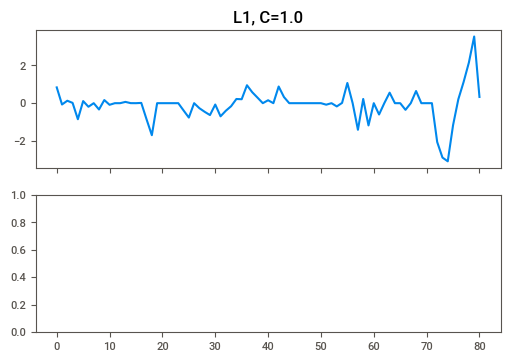

In [571]:
#plot
coef_plot(clf_l1_C1, 'L1, C=1.0')

## Compare the performance to the ridge regression model.
The Ridge and Lasso model had .1 difference in the test scores, but in general both are high around .9 on a scale of -1 to 1. The outputs look very similar between the two. 

## Model 3: Lasso regression with C=0.01
Fit another lasso regression but use C=0.01. 

In [572]:
# Classifier model
clf_model_l1_C001 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_l1_C001 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_C001)])

# Fit model on training data 
clf_l1_C001.fit(X_train, y_train)

print(f"Training score: {clf_l1_C001.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_C001.score(X_test, y_test):.3f}")

Training score: 0.953
Test score: 0.947


C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Confusion matrix for train, without normalization
[[16002   125]
 [  692   471]]
Normalized confusion matrix for train
[[0.99224902 0.00775098]
 [0.5950129  0.4049871 ]]


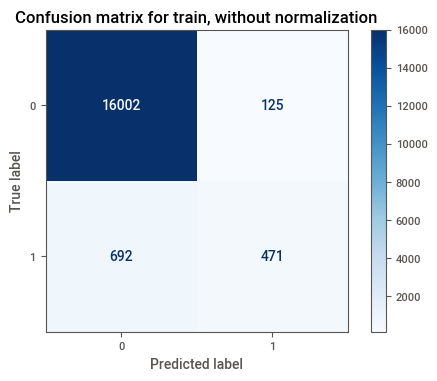

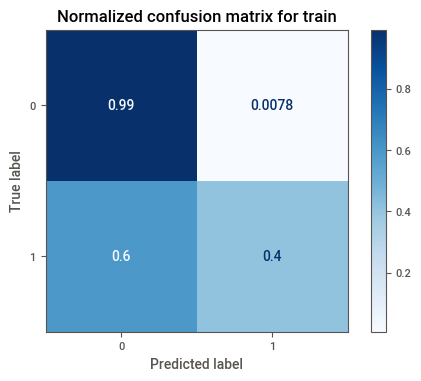

In [573]:
#Create confusion matrices for training 
#Create a plot of the coefficients
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names =clf_l1_C001['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C001, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3964   30]
 [ 197  132]]
Normalized confusion matrix for test
[[0.99248873 0.00751127]
 [0.59878419 0.40121581]]


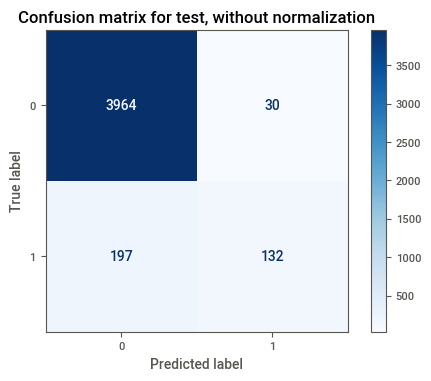

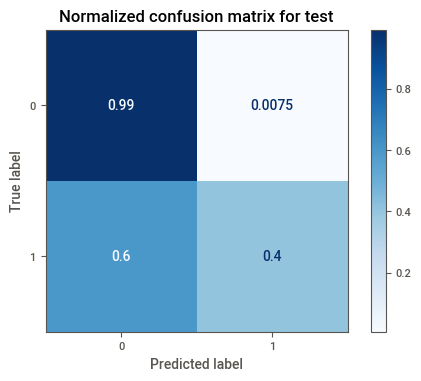

In [574]:
#test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names =clf_l1_C001['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_C001, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [575]:
#steps of model
clf_l1_C001.steps[1]

('classifier',
 LogisticRegression(C=0.01, max_iter=2000, penalty='l1', solver='saga'))

In [576]:
#def plot
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

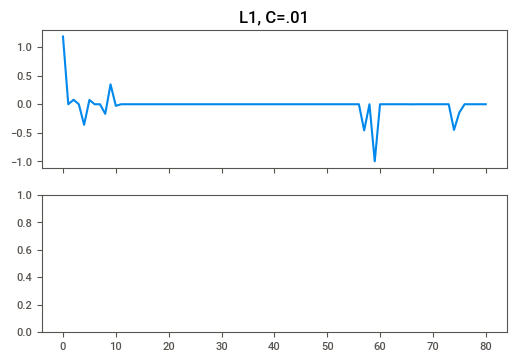

In [577]:
#plot
coef_plot(clf_l1_C001, 'L1, C=.01')

###  Discuss why the plot looks so different than the previous plots.
Does this enforce more or less regularization? 
Higher values of  𝐶 , means more weight on minimizing residuals and thus, less, regularization. By decreases C from 1 (model 1 and 2) to .01 in model 3, we increase regularization.

The plot looks different than the previous because we increased regualriztion, which shrunk the coeffiecents. By doing this, variance in the model was reduced. Since we already have a low amount of input variables the models prediction changes less then we would expect for it to overall. By decreasing 'C' we also put more strain on the penalty which shrinks values towards the center of our predictor. The decrease in test score leads me to believe this model was overfit.

## Model 4: Lasso regression with optimal C value
Now use LogisticRegressionCV to fit a model and let sklearn determine the optimal C value to use. Again, compute score and confusion matrices. Also, print out the optimal value of C. Does regularization help for this problem?

In [579]:
# Classifier model
clf_model_l1_CV001 = LogisticRegressionCV(solver='saga', penalty='l1', max_iter=500)

# Append classifier to preprocessing pipeline.
clf_l1_CV001 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_CV001)])

# Fit model on training data 
clf_l1_CV001.fit(X_train, y_train)

print(f"Training score: {clf_l1_CV001.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_CV001.score(X_test, y_test):.3f}")

C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training score: 0.960
Test score: 0.957


C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [580]:
#print optimal C
clf_l1_CV001.named_steps['classifier'].C_

array([0.35938137])

In [581]:
# Classifier model
clf_model_l1_CV = LogisticRegression(penalty='l1', C=.36, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_l1_CV = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_l1_CV)])

# Fit model on training data 
clf_l1_CV.fit(X_train, y_train)

print(f"Training score: {clf_l1_CV.score(X_train, y_train):.3f}")
print(f"Test score: {clf_l1_CV.score(X_test, y_test):.3f}")

Training score: 0.960
Test score: 0.956


Confusion matrix for train, without normalization
[[15947   180]
 [  512   651]]
Normalized confusion matrix for train
[[0.98883859 0.01116141]
 [0.44024076 0.55975924]]


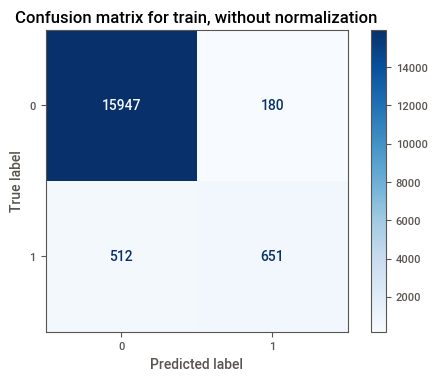

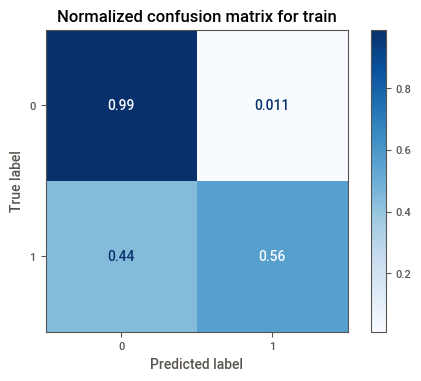

In [582]:
#Create confusion matrices for training 
#Create a plot of the coefficients
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names =clf_l1_CV['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_CV, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3947   47]
 [ 143  186]]
Normalized confusion matrix for test
[[0.98823235 0.01176765]
 [0.43465046 0.56534954]]


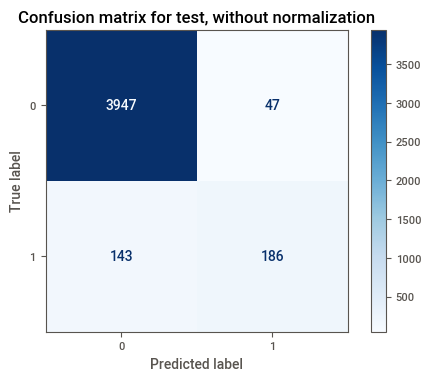

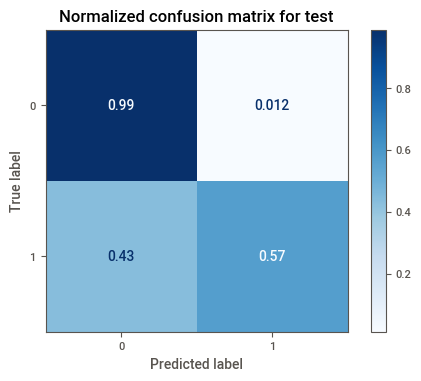

In [583]:
#test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names =clf_l1_CV['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_l1_CV, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [584]:
#def plot
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

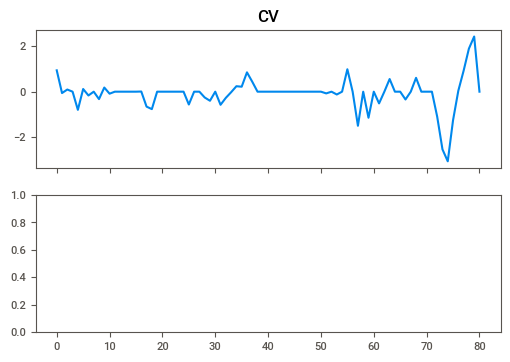

In [585]:
#plot
coef_plot(clf_l1_CV, 'CV')

### Does regularization help for this problem?
When the optimal C value of .36 is entered the test and train score essentially go back to normal from the Ridge C=1 method. By increasing the C value from 0.01 to .36 we decrease regularization and do less with the model to prevent overfitting. By doing this we have increased the variance of the model which does not help us predict price_gt_1M.


## Task 5 - Random forest model
Now fit a random forest model to predict price_gt_1M. As we did above, for both train and test, compute the accuracy score, create a confusion matrix

In [586]:

clf_rf_model = RandomForestClassifier(oob_score=True, random_state=0)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_rf_model)])

# Fit model on new training data - notice that clf is actually the Pipeline
clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.963


Confusion matrix for train, without normalization
[[16127     0]
 [    1  1162]]
Normalized confusion matrix for train
[[1.00000000e+00 0.00000000e+00]
 [8.59845228e-04 9.99140155e-01]]


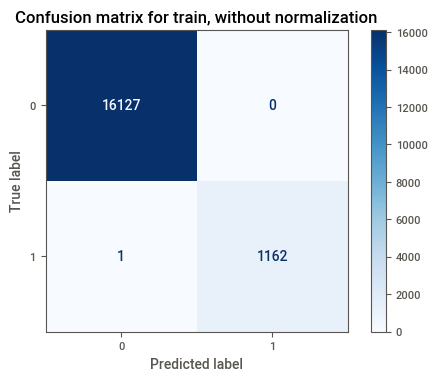

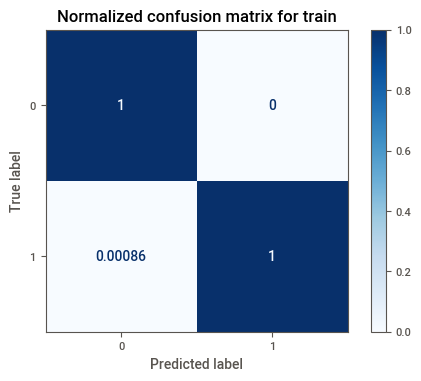

In [587]:
#Create confusion matrices for training 
#Create a plot of the coefficients
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names =clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3957   37]
 [ 124  205]]
Normalized confusion matrix for test
[[0.9907361 0.0092639]
 [0.3768997 0.6231003]]


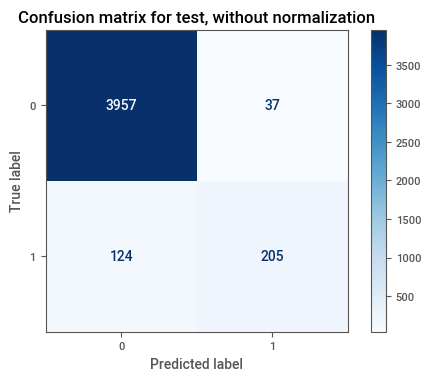

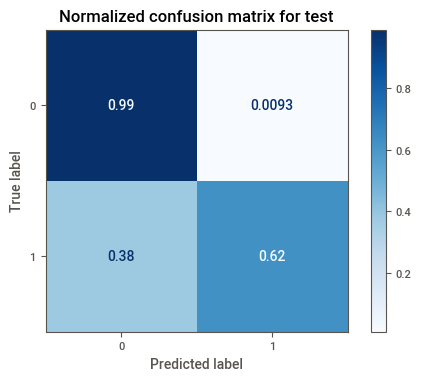

In [588]:
#test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names =clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Conclusion
The performance relative to my logistic regression models was very noticeable. The accuracy of training shot to 100% where the test also increased a little bit. This model performed better, but was likely over fit. I believe a reason for this may be because we were working with a binary model and it does not 'extrapolate' beyond what is there. 

### Task 6 - a little error exploration (more challenging)

In [589]:
price_df = pd.read_csv ('data/kc_house_data_regression.csv')
print(price_df)


       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [590]:
extracted_col = price_df["price"]

In [591]:
housing_df = housing_df.join(extracted_col)

In [592]:
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M,price
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639,0,538000.0
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062,0,180000.0
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000,0,604000.0
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47,-122,1530,1509,0,360000.0
21609,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47,-122,1830,7200,0,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47,-122,1020,2007,0,402101.0
21611,3,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47,-122,1410,1287,0,400000.0


In [593]:
clf_LR_model_final = LogisticRegression(penalty='l2', C=10, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_LR_final = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_LR_model_final)])

# Fit model on training data 
clf_LR_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_LR_final.score(X_train, y_train))

# Make predictions on the test data
clf_LR_final_predictions = clf_LR_final.predict(X_test)

# Print out a few predictions just to see what they look like
print(clf_LR_final_predictions[:20])  


Training score: 0.960
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\watte\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [594]:
pred_df = pd.DataFrame({"Prediction": clf_LR_final_predictions})

In [595]:
extract_col = pred_df["Prediction"]

In [596]:
housing_df = housing_df.join(extract_col)
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M,price,Prediction
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47,-122,1340,5650,0,221900.0,0.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47,-122,1690,7639,0,538000.0,0.0
2,2,1.0,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47,-122,2720,8062,0,180000.0,0.0
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47,-122,1360,5000,0,604000.0,0.0
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47,-122,1800,7503,0,510000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.5,1530,1131,3.0,0,0,3,8,1530,...,2009,0,98103,47,-122,1530,1509,0,360000.0,NaN
21609,4,2.5,2310,5813,2.0,0,0,3,8,2310,...,2014,0,98146,47,-122,1830,7200,0,400000.0,NaN
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,2009,0,98144,47,-122,1020,2007,0,402101.0,NaN
21611,3,2.5,1600,2388,2.0,0,0,3,8,1600,...,2004,0,98027,47,-122,1410,1287,0,400000.0,NaN


array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price_gt_1M'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Prediction'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

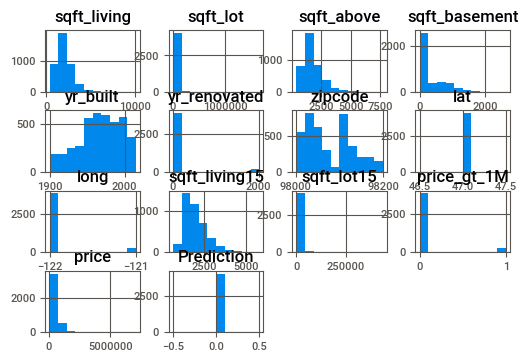

In [599]:
housing_df.loc[housing_df['Prediction'] == 0].hist()